In [59]:
# randomgrowth.jl
using Plots
using Interact

function calculate_random_growth(M, N, q, T=1000)
    G = zeros(M, N)

    all_heatmaps = []

    G[1,1] = true
    # update the possible sets
    # display(
    #display(heatmap((0,N), (M,0), G))
    push!(all_heatmaps, copy(G))
    for t = 1:T
        sets = next_possible_squares(G)
        ## Highlights all the possible squares
        for i = 1:length(sets)
            idx = sets[i]
            G[idx[1], idx[2]] = 0.25
        end
        #display(heatmap((0,N), (M,0), G))
        push!(all_heatmaps, copy(G))

        #sleep(.01)

        ## Actual growth
        for i = 1:length(sets)
            ison = 0.5 * (rand() > (1-q))
            if ison > 0
                idx = sets[i]
                G[idx[1], idx[2]] = ison
            end
        end
        #display(heatmap((0,N), (M,0), G))
        push!(all_heatmaps, copy(G))

        G[G .== 0.5] .= 1
        G[G .== 0.25] .= 0
        #sleep(.01)
    end
    #return G

    return all_heatmaps
end

function visualize_random_growth(M, N, q)
    all_heatmaps = calculate_random_growth(M, N, q)

    @manipulate for i in slider( 1:length(all_heatmaps) , value=1)
        t = div(i-1,2)
        heatmap(all_heatmaps[i], aspect_ratio=1)
        plot!(title="$t")
        plot!(0:.1:t, x->((√t-√(x/q))^2)*q,xlim=(0,M),ylim=(0,N),color="blue",lw=3,legend=false)
    end
end

function next_possible_squares(G)
    M, N = size(G)
    sets = Array{Tuple{Int,Int}, 1}(undef, 0)
    for ii = 1:M
        for jj = 1:N
            if G[ii, jj] == 0
                if  (ii == 1 && jj > 1 && G[ii, jj-1] == 1) ||
                    (jj == 1 && ii > 1 && G[ii-1, jj] == 1) ||
                    (ii > 1 && jj > 1 && G[ii-1, jj] == 1 && G[ii, jj-1] == 1)
                    push!(sets, (ii,jj))
                end
            end
        end
    end
    sets
end




next_possible_squares (generic function with 1 method)

In [60]:
visualize_random_growth(100, 100, 0.5)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 2001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000125786f50, Task (runnable) @0x0000000125786f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35

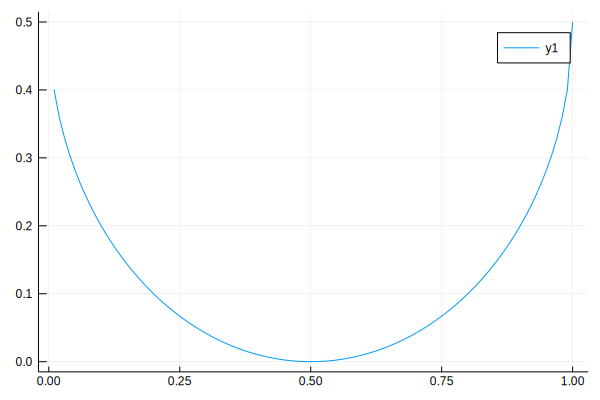

In [21]:
# solve   x+y + 2*sqrt(q*x*y) = (1-q)*c  for x
q= .5
c = 1.0
 x = .01:.01:1

plot(x, x -> -2* sqrt(-c*q^2 * x + c*q*x + q^2 *x^2 - q *x^2) + c* (-q) + c + 2 *q*x - x )

In [2]:
using Plots